
Dataset Columns: ['Student ID', 'Age', 'Gender', 'Academic Performance (GPA)', 'Study Hours Per Week', 'Social Media Usage (Hours per day)', 'Sleep Duration (Hours per night)', 'Physical Exercise (Hours per week)', 'Family Support  ', 'Financial Stress', 'Peer Pressure', 'Relationship Stress', 'Mental Stress Level', 'Counseling Attendance', 'Diet Quality', 'Stress Coping Mechanisms', 'Cognitive Distortions', 'Family Mental Health History', 'Medical Condition', 'Substance Use']

Logistic Regression Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        68
           1       0.15      0.07      0.10        42
           2       0.26      0.26      0.26        42

    accuracy                           0.36       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.32      0.36      0.33       152

Confusion Matrix:
 [[41  9 18]
 [26  3 13]
 [23  8 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.69      0.55        68
           1       0.27      0.10      0.14        42
           2       0.32      0.26      0.29        42

    accuracy                           0.41       152
   macro avg       0.35      0.35      0.33       152
weighted avg       0.37      0.41      0.36       152

Confusion Matrix:
 [[47  5 16]
 [31  4  7]
 [25  6 11]]

SVM Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        68
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        42

    accuracy                           0.45       152
   macro avg       0.15      0.33      0.21       152
weighted avg       0.20      0.45      0.28       152

Confusion Matrix:
 [[68  0  0]
 [42  0  0]
 [42  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Top 3 Important Features:
Study Hours Per Week        0.099170
Student ID                  0.096568
Stress Coping Mechanisms    0.070970
dtype: float64


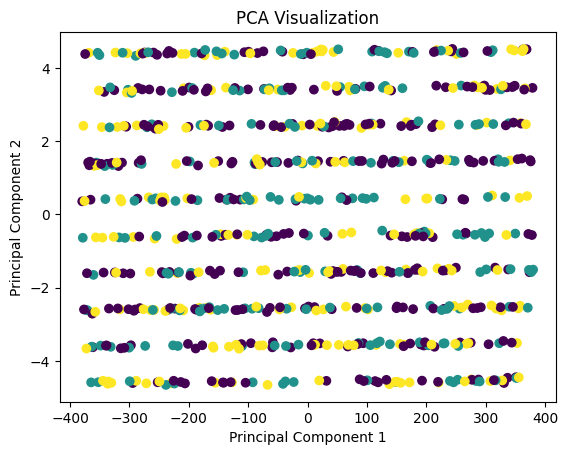


T-Test Results:
T-Statistic: -136.7110130856366 P-value: 0.0

Z-Test Skipped: 'Study Hours' or 'Counseling Attendance' column not found.

Chi-Square Test Results:
Chi-Square Statistic: 8.910304885158673 P-value: 0.25916012793906545


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_1samp, chi2_contingency
from statsmodels.stats.weightstats import ztest

# Step 1: Load the dataset
df = pd.read_csv("Student_Mental_Stress_and_Coping_Mechanisms.csv")

# Print dataset column names
print("\nDataset Columns:", df.columns.tolist())

# Step 2: Data Preprocessing
# Drop non-relevant columns (like ID if present)
df.drop(columns=['ID'], errors='ignore', inplace=True)

# Handling missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 3: Convert Target Variable to Classification
target = "Mental Stress Level"
if target in df.columns:
    df[target] = pd.qcut(df[target], q=3, labels=[0, 1, 2])
else:
    raise KeyError(f"Column '{target}' not found in dataset. Check column names.")

X = df.drop(columns=[target])
y = df[target].astype(int)  # Ensure integer categories

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"\n{name} Performance:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Feature importance from Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nTop 3 Important Features:")
print(feature_importances.nlargest(3))

# Step 7: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

# Step 8: One-sample T-test (hypothesized mean = 5)
t_stat, p_value = ttest_1samp(df[target], 5)
print("\nT-Test Results:")
print("T-Statistic:", t_stat, "P-value:", p_value)

# Step 9: Z-test for Study Hours (Check if column exists)
if "Study Hours" in df.columns and "Counseling Attendance" in df.columns:
    counseling_yes = df[df['Counseling Attendance'] == 1]['Study Hours']
    counseling_no = df[df['Counseling Attendance'] == 0]['Study Hours']
    if len(counseling_yes) > 1 and len(counseling_no) > 1:
        z_stat, p_val = ztest(counseling_yes, counseling_no)
        print("\nZ-Test Results:")
        print("Z-Statistic:", z_stat, "P-value:", p_val)
    else:
        print("\nZ-Test cannot be performed due to insufficient data.")
else:
    print("\nZ-Test Skipped: 'Study Hours' or 'Counseling Attendance' column not found.")

# Step 10: Chi-square test for gender and counseling attendance
if "Gender" in df.columns and "Counseling Attendance" in df.columns:
    gender_counseling_table = pd.crosstab(df['Gender'], df['Counseling Attendance'])
    chi2_stat, chi2_p, _, _ = chi2_contingency(gender_counseling_table)
    print("\nChi-Square Test Results:")
    print("Chi-Square Statistic:", chi2_stat, "P-value:", chi2_p)
else:
    print("\nChi-Square Test Skipped: 'Gender' or 'Counseling Attendance' column not found.")
